In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
# 손글씨 이미지가 숫자로 변환되어 있음을 알 수 있고,
#  0 ~ 255 값이 할당되는 것을 알 수 있다.
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
# 훈련 데이터 개수가 6만개가 존재하고,
#  28 x 28 로 구성되는것을 확인할 수 있다.
print(len(x_train))
print(len(x_train[0]))
print(len(x_train[0][0]))

60000
28
28


In [0]:
# 데이터셋의 최대값이 255 이므로 255로 나눠서 값을 정규화 시킨다.
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

In [6]:
# 라벨값으로는 x_train[0] ~ x_train[60000] 까지의 실제 결과를 0부터 9까지의 값 중에 하나로 나타낸것
print(y_train)
print(len(y_train))

[5 0 4 ... 5 6 8]
60000


In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [8]:
# 원핫 인코딩을 통해 0 ~ 9 까지의 index를 가진 배열에 해당 인덱스를 1로 준다.
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# 2. 모델 구성하기
model = Sequential()
# 28 x 28 의 이미지를 입력값으로 넣으므로 입력층이 28 * 28 = 784 로 구성된다.
# relu 활성화 함수를 사용
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
# 다중클래스 분류이므로 softmax를 사용
# 출력이 0~9 이므로 10이 된다.
model.add(Dense(units=10, activation='softmax'))

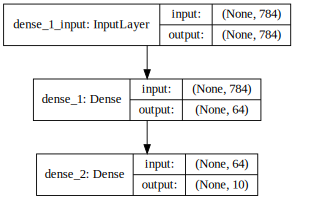

In [10]:
# 딥러닝 모델 가시화
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline
SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [0]:
# 3. 모델 학습과정 설정하기
# categorical_crossentropy : 다중 분류 손실함수. 출력값이 one-hot encoding 된 결과로 나오고
#  실측 결과와의 비교시에도 실측 결과는 one-hot encoding 형태로 구성된다.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [12]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.6738 - accuracy: 0.8262
Epoch 2/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3534 - accuracy: 0.9009
Epoch 3/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3058 - accuracy: 0.9142
Epoch 4/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.2777 - accuracy: 0.9216
Epoch 5/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.2560 - accuracy: 0.9282


In [13]:
print(hist.history)

{'loss': [0.6737602919975917, 0.3534182510574659, 0.30583713319102923, 0.2776598885337512, 0.2560165289441744], 'accuracy': [0.82621664, 0.9009333, 0.9142333, 0.9216167, 0.9281833]}


In [15]:
# 5. 학습과정 살펴보기
# loss : 훈련 손실값
# acc : 훈련 정확도
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['accuracy'])

## training loss and acc ##
[0.6737602919975917, 0.3534182510574659, 0.30583713319102923, 0.2776598885337512, 0.2560165289441744]
[0.82621664, 0.9009333, 0.9142333, 0.9216167, 0.9281833]


In [16]:
# 6. 모델 평가하기
# 시험셋으로 evaluate() 메서드를 이용해서 모델을 평가한다.
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 23us/step
## evaluation loss and_metrics ##
[0.24000177099108697, 0.9315999746322632]


In [20]:
# 7. 모델 사용하기
import numpy as np
xhat = x_test[0:1]
# predict() 메서드를 통해 모델 사용
yhat = model.predict(xhat)
print('## yhat ##')
# argmax() 메서드를 통해 어떤 인덱스 값이 가장 높은 확률인지 확인
print(np.argmax(yhat))
print(np.argmax(y_test[0]))

## yhat ##
7
7


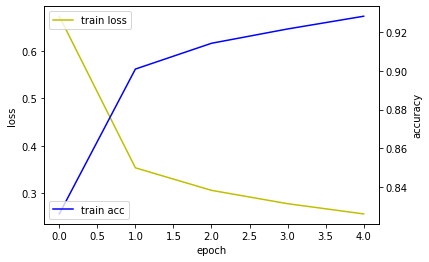

In [22]:
# 학습 진행도 확인
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

# 훈련 손실값
loss_ax.plot(hist.history['loss'], 'y', label='train loss')

# 훈련 정확도
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
# 모델 저장
model.save('mnist_mlp_model.h5')

In [0]:
# 모델 불러오기
from keras.models import load_model
model2 = load_model('/content/mnist_mlp_model.h5')

In [29]:
# 불러온 모델 사용
xhat = x_test[0:1]
yhat = model2.predict(xhat)
print(yhat)
print(np.argmax(yhat))

[[1.2036136e-04 1.9774322e-07 9.3077746e-04 1.9363506e-03 7.1669574e-06
  1.5283146e-04 1.5845912e-07 9.9639773e-01 3.6787835e-05 4.1764107e-04]]
7
